# Milestone 2 - Phase 2
Muhammad Ikhsan Rahman Hakim - FTDS001


## 73 Sports Image Classification


### Content
Collection of sports images covering 73 different sports. Images are 224,224,3 jpg format.

### Context
> *Predict the name of sports from the sports images*

[Link to dataset](https://www.kaggle.com/gpiosenka/sports-classification)

In [1]:
import numpy as np
import PIL
import os
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img, array_to_img
from tensorflow.keras.preprocessing import image_dataset_from_directory
from sklearn.pipeline import Pipeline, make_pipeline

# evaluation
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV

%matplotlib inline

# Data Loading

In [2]:
# to make this notebook's output stable across runs
np.random.seed(42)
tf.random.set_seed(42)

In [3]:
train_folder=r'73 Sports Image Classification/train/'
val_folder=r'73 Sports Image Classification/valid/'
test_folder=r'73 Sports Image Classification/test/'

# Data Exploration

In [4]:
import pathlib
data_dir = pathlib.Path(train_folder)
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

10416


Ada 10.416 total gambar untuk data training.

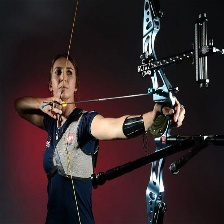

In [5]:
archery = list(data_dir.glob('archery/*'))
PIL.Image.open(str(archery[0]))

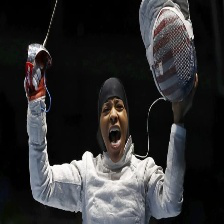

In [6]:
fencing = list(data_dir.glob('fencing/*'))
PIL.Image.open(str(fencing[0]))

# Data Preprocessing

In [7]:
IMG_WIDTH = 224
IMG_HEIGHT = 224
batch_size = 5

Set up default ukuran gambar yang diolah dan jumlah batch training yang dipakai.

In [8]:
train_dataset = image_dataset_from_directory(
    train_folder,
    shuffle = True,
    batch_size = batch_size,
    image_size = (IMG_HEIGHT, IMG_WIDTH))

Found 10416 files belonging to 73 classes.


In [9]:
val_dataset = image_dataset_from_directory(
    val_folder,
    batch_size = batch_size,
    image_size = (IMG_HEIGHT, IMG_WIDTH))

Found 365 files belonging to 73 classes.


In [10]:
test_dataset = image_dataset_from_directory(
    test_folder,
    batch_size = batch_size,
    image_size = (IMG_HEIGHT, IMG_WIDTH))

Found 365 files belonging to 73 classes.


In [11]:
class_names = train_dataset.class_names
print(class_names)

['air hockey', 'ampute football', 'archery', 'arm wrestling', 'balance beam', 'barell racing', 'baseball', 'basketball', 'billiards', 'bmx', 'bobsled', 'bowling', 'boxing', 'bull riding', 'canoe slamon', 'cricket', 'croquet', 'curling', 'fencing', 'field hockey', 'figure skating men', 'figure skating pairs', 'figure skating women', 'football', 'formula 1 racing', 'frisbee', 'giant slalom', 'golf', 'hammer throw', 'harness racing', 'high jump', 'hockey', 'horse jumping', 'horse racing', 'hurdles', 'ice climbing', 'jai alai', 'javelin', 'judo', 'lacrosse', 'luge', 'motorcycle racing', 'nascar racing', 'olympic wrestling', 'parallel bar', 'pole vault', 'polo', 'pommel horse', 'rings', 'rock climbing', 'rollerblade racing', 'rowing', 'rugby', 'sailboat racing', 'shot put', 'ski jumping', 'skydiving', 'snow boarding', 'snowmobile racing', 'speed skating', 'sumo wrestling', 'surfing', 'swimming', 'table tennis', 'tennis', 'track bicycle', 'tug of war', 'uneven bars', 'volleyball', 'water pol

#### Using autotune to prevent bottleneck on training

In [12]:
AUTOTUNE = tf.data.AUTOTUNE

train_dataset = train_dataset.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_dataset = val_dataset.cache().prefetch(buffer_size=AUTOTUNE)
test_dataset = test_dataset.prefetch(buffer_size=AUTOTUNE)

# Define Model

In [13]:
num_classes = 73

# Base Model
model = Sequential([
    # standardized data
    layers.experimental.preprocessing.Rescaling(1./255, input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)),
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes)
])

In [14]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling (Rescaling)        (None, 224, 224, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 224, 224, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 112, 112, 32)      4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 56, 56, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 28, 28, 64)        0

## Train base model

In [16]:
epochs=10

history = model.fit(train_dataset, validation_data=val_dataset, epochs=epochs)

Epoch 1/10
2084/2084 [==============================] - 38s 13ms/step - loss: 3.6043 - accuracy: 0.1167 - val_loss: 2.8772 - val_accuracy: 0.2548
Epoch 2/10
2084/2084 [==============================] - 24s 12ms/step - loss: 2.3061 - accuracy: 0.3917 - val_loss: 2.4901 - val_accuracy: 0.3479
Epoch 3/10
2084/2084 [==============================] - 24s 12ms/step - loss: 1.0993 - accuracy: 0.6903 - val_loss: 2.9707 - val_accuracy: 0.3370
Epoch 4/10
2084/2084 [==============================] - 24s 12ms/step - loss: 0.3565 - accuracy: 0.8980 - val_loss: 4.2702 - val_accuracy: 0.3342
Epoch 5/10
2084/2084 [==============================] - 24s 12ms/step - loss: 0.1914 - accuracy: 0.9456 - val_loss: 5.0198 - val_accuracy: 0.3178
Epoch 6/10
2084/2084 [==============================] - 24s 12ms/step - loss: 0.1392 - accuracy: 0.9611 - val_loss: 6.3596 - val_accuracy: 0.2712
Epoch 7/10
2084/2084 [==============================] - 24s 12ms/step - loss: 0.1304 - accuracy: 0.9651 - val_loss: 7.2466 -

### Visualize base model training results

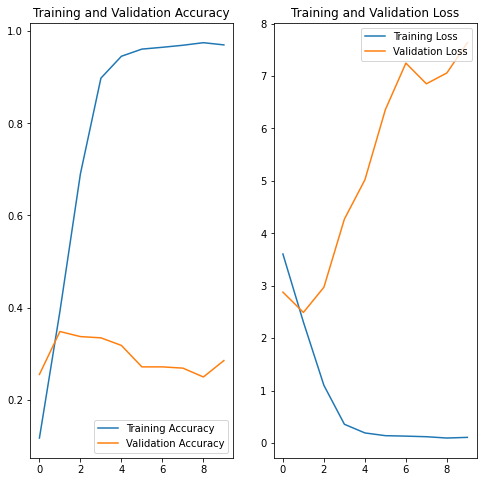

In [17]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

Dari hasil plot diatas menunjukkan bahwa model overfitting.

## Model Improving with Data Augmentation and Dropout

In [30]:
data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal", input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)

Dengan data augmentation, jumlah data training dapat ditambah dengan cara menambahkan data tambahan hasil dari "random transformation" sample data training. Kali ini, gambar-gambar yang ada di data training akan di flip, rotasi dan zoom.

In [19]:
num_classes = 73

model = Sequential([
    data_augmentation,
    layers.experimental.preprocessing.Rescaling(1./255),
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Dropout(0.2), # This means dropping out 20% of the output units randomly from the applied layer.
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes)
])

Selain menambahkan data augmentation, saya juga menambahkan dropout untuk mengurangi overfitting.

In [20]:
model.compile(optimizer = 'adam',
              loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics = ['accuracy'])

In [21]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_1 (Sequential)    (None, 224, 224, 3)       0         
_________________________________________________________________
rescaling_1 (Rescaling)      (None, 224, 224, 3)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 224, 224, 16)      448       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 112, 112, 16)      0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 112, 112, 32)      4640      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 56, 56, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 56, 56, 64)       

### Train model

In [22]:
epochs = 20
history = model.fit(train_dataset, validation_data=val_dataset, epochs=epochs)

Epoch 1/20
2084/2084 [==============================] - 33s 16ms/step - loss: 3.8391 - accuracy: 0.0775 - val_loss: 3.1798 - val_accuracy: 0.2110
Epoch 2/20
2084/2084 [==============================] - 32s 15ms/step - loss: 2.9927 - accuracy: 0.2281 - val_loss: 2.5137 - val_accuracy: 0.3644
Epoch 3/20
2084/2084 [==============================] - 32s 15ms/step - loss: 2.5428 - accuracy: 0.3253 - val_loss: 2.4144 - val_accuracy: 0.3699
Epoch 4/20
2084/2084 [==============================] - 32s 15ms/step - loss: 2.3071 - accuracy: 0.3772 - val_loss: 2.0801 - val_accuracy: 0.4137
Epoch 5/20
2084/2084 [==============================] - 32s 15ms/step - loss: 2.1456 - accuracy: 0.4178 - val_loss: 2.0495 - val_accuracy: 0.4630
Epoch 6/20
2084/2084 [==============================] - 32s 15ms/step - loss: 2.0341 - accuracy: 0.4446 - val_loss: 2.1430 - val_accuracy: 0.4438
Epoch 7/20
2084/2084 [==============================] - 35s 17ms/step - loss: 1.9540 - accuracy: 0.4602 - val_loss: 2.0188 -

### Visualize training results
Create plots of loss and accuracy on the training and validation sets.

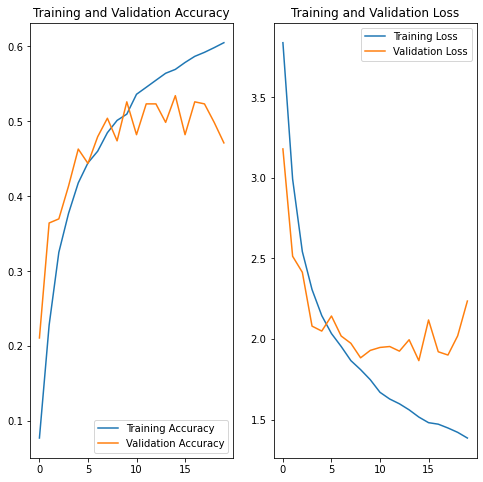

In [23]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

Setelah diterapkan data augmentation dan dropout, hasil training data tidak overfit lagi. Namun setelah epoch ke-13 val_accuracy semakin turun dan val_loss semakin turun. Kemungkinan jika epoch ditambahkan akan terjadi overfitting kembali, hal ini mungkin karena kurangnya layer atau perlu ditambahkan juga BatchNormalization pada tiap layernya agar membantu model untuk tidak overfittung.

## Model Evaluation

In [24]:
model.evaluate(test_dataset)

73/73 [==============================] - 1s 7ms/step - loss: 2.0083 - accuracy: 0.5397


[2.0082719326019287, 0.5397260189056396]

Akurasi yang didapatkan hanya 53%. Claim dari pembuat dataset ini, jika model yang dibuat bagus, maka skor akurasi yang didapat cukup tinggi hingga diatas 90%. Untuk itu, percobaan selanjutnya saya akan mencoba menggunakan pretrained model MobileNetV2 yang sudah terbukti memiliki struktur yang bagus dan telah di training dengan dataset yang jauh lebih besar dari ini.

## Model Inference

In [25]:
test_image = r'73 Sports Image Classification/test/bmx/1.jpg'

img = keras.preprocessing.image.load_img(
    test_image, target_size=(IMG_HEIGHT, IMG_WIDTH)
)

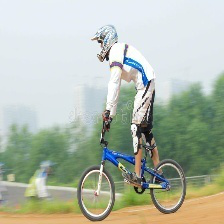

In [26]:
img

In [27]:
img_array = keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

This image most likely belongs to bmx with a 57.71 percent confidence.


### Model Saving

In [29]:
model.save("model_base.h5")

# Using pre-trained model: MobileNetV2

In [100]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [101]:
# Create the base model from the pre-trained model MobileNet V2
base_model = tf.keras.applications.MobileNetV2(input_shape=(IMG_HEIGHT, IMG_WIDTH, 3),
                                               include_top=False,
                                               weights='imagenet')

Freeze semua layer MobileNet V2. Agar tidak berubah weightnya. Dan kita ganti classification layernya saja, diganti dengan punya kita. Selain untuk menyesuaikan dengan dataset yang kita punya, hal ini untuk mengurangi waktu komputasi training ulang dari awal dan kemungkinan mengubah weight ("hasil belajar") model ini.

In [103]:
base_model.trainable = False

In [104]:
# Let's take a look at the base model architecture
base_model.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 112, 112, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 112, 112, 32) 128         Conv1[0][0]                      
__________________________________________________________________________________________________
Conv1_relu (ReLU)               (None, 112, 112, 32) 0           bn_Conv1[0][0]                   
_______________________________________________________________________________

Karena layer-layernya dibekukan makan trainable params model ini menjadi nol. Dengan men*freeze* layer sebelumnya, selain menghemat banyak waktu untuk training ulang, "hasil belajar" model (dengan datset yang sangat besar)juga tidak ikut hilang jika kita training kembali dengan dataset kita yang tidak seberapa ini.

## Create model

In [105]:
data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal"),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)

In [106]:
preprocess_input = tf.keras.applications.mobilenet_v2.preprocess_input
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()
prediction_layer = tf.keras.layers.Dense(73)

In [107]:
inputs = tf.keras.Input(shape=(IMG_HEIGHT, IMG_WIDTH, 3))
x = data_augmentation(inputs)
x = preprocess_input(x)
x = base_model(x, training=False)
x = global_average_layer(x)
x = tf.keras.layers.Dropout(0.2)(x)
outputs = prediction_layer(x)
model_MobileNetV2 = tf.keras.Model(inputs, outputs)

In [108]:
base_learning_rate = 0.0001

model_MobileNetV2.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=base_learning_rate),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [109]:
model_MobileNetV2.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
sequential (Sequential)      (None, 224, 224, 3)       0         
_________________________________________________________________
tf.math.truediv (TFOpLambda) (None, 224, 224, 3)       0         
_________________________________________________________________
tf.math.subtract (TFOpLambda (None, 224, 224, 3)       0         
_________________________________________________________________
mobilenetv2_1.00_224 (Functi (None, 7, 7, 1280)        2257984   
_________________________________________________________________
global_average_pooling2d (Gl (None, 1280)              0         
_________________________________________________________________
dropout (Dropout)            (None, 1280)              0     

## Train model

In [110]:
epochs = 20
history = model_MobileNetV2.fit(train_dataset, validation_data=val_dataset, epochs=epochs)

Epoch 1/20
2084/2084 [==============================] - 59s 27ms/step - loss: 2.9456 - accuracy: 0.3003 - val_loss: 1.6395 - val_accuracy: 0.6466
Epoch 2/20
2084/2084 [==============================] - 55s 26ms/step - loss: 1.5343 - accuracy: 0.6226 - val_loss: 0.9953 - val_accuracy: 0.7890
Epoch 3/20
2084/2084 [==============================] - 54s 26ms/step - loss: 1.0936 - accuracy: 0.7269 - val_loss: 0.7338 - val_accuracy: 0.8301
Epoch 4/20
2084/2084 [==============================] - 54s 26ms/step - loss: 0.8856 - accuracy: 0.7681 - val_loss: 0.5996 - val_accuracy: 0.8575
Epoch 5/20
2084/2084 [==============================] - 54s 26ms/step - loss: 0.7569 - accuracy: 0.8002 - val_loss: 0.5240 - val_accuracy: 0.8630
Epoch 6/20
2084/2084 [==============================] - 53s 26ms/step - loss: 0.6905 - accuracy: 0.8188 - val_loss: 0.4616 - val_accuracy: 0.8795
Epoch 7/20
2084/2084 [==============================] - 53s 26ms/step - loss: 0.6199 - accuracy: 0.8337 - val_loss: 0.4268 -

### Visualize training results

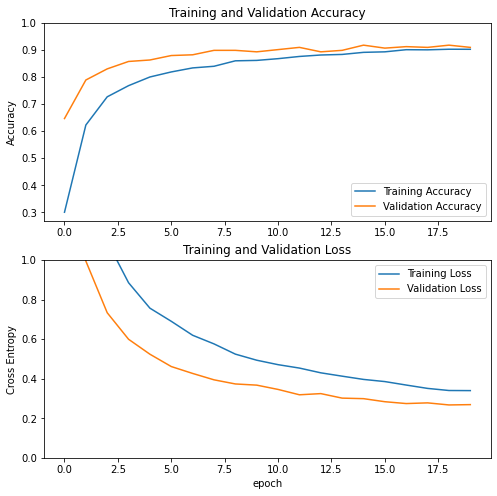

In [111]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

Dengan pre-trained model MobileNetV2, hasil yang didapatkan jauh lebih baik dari model yang kita buat sendiri sebelumnya. Hal ini dikarenakan perbedaan jumlah dataset yang digunakan untuk training model jauh lebih besar dan rancangan arsitektur yang lebih baik. Hanya dengan 20 epoch saja, hasil yang didapat sudah sangat baik. Grafik yang dihasilkan pun terlihat lancar antara naiknya akurasi dan turunnya loss dari data training dan data validasi.

### Model Evaluation

In [112]:
model_MobileNetV2.evaluate(test_dataset)

73/73 [==============================] - 2s 20ms/step - loss: 0.1798 - accuracy: 0.9507


[0.1798064112663269, 0.9506849050521851]

Skor akurasi yang didapatkan 95%.

## Model Inference

In [152]:
test_image = r'73 Sports Image Classification/test/shot put/3.jpg'

img = keras.preprocessing.image.load_img(
    test_image, target_size=(IMG_HEIGHT, IMG_WIDTH)
)

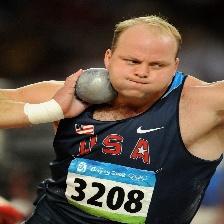

In [153]:
img

In [154]:
img_array = keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)

predictions = model_MobileNetV2.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

This image most likely belongs to shot put with a 98.83 percent confidence.


Hasil akurasi prediksi adalah 98%

## Model Saving

In [148]:
model_MobileNetV2.save("model_base_MobileNetV2.h5")

## Fine tuning
Adalah proses dimana kita mencoba untuk melatih (train) model lagi dari hasil latihan sebelumnya dengan layer base_model MobileNetV2 sebagian tidak dibekukan (unfreeze).

#### Un-freeze the top layers of the model

In [158]:
base_model.trainable = True

In [157]:
# Let's take a look to see how many layers are in the base model
print("Number of layers in the base model: ", len(base_model.layers))

Number of layers in the base model:  154


In [159]:
# Fine-tune from this layer onwards
fine_tune_at = 120

# Freeze all the layers before the `fine_tune_at` layer
for layer in base_model.layers[:fine_tune_at]:
  layer.trainable =  False

Di sini, layer yang akan saya training kembali adalah layer ke-121 sampai akhir. Sementara layer sebelumnya akan tetap di*freeze*.

In [160]:
model_MobileNetV2.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              optimizer = tf.keras.optimizers.RMSprop(learning_rate=base_learning_rate/10),
              metrics=['accuracy'])

Optimizer yang digunakan kali ini berbeda dari sebelumnya, yakni RMSprop yang merupakan turunan dari Optimizer. Menurut web resmi tensorflow [klik di sini](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/Optimizer), Optimizer baiknya digunakan setelah kita mencoba optimizer lain terlebih dahulu sepertim adam, sgd dll. Karena di awal kita sudah memakai optimizer "adam" maka kali ini kita akan mencoba RMSprop.

In [161]:
model_MobileNetV2.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
sequential (Sequential)      (None, 224, 224, 3)       0         
_________________________________________________________________
tf.math.truediv (TFOpLambda) (None, 224, 224, 3)       0         
_________________________________________________________________
tf.math.subtract (TFOpLambda (None, 224, 224, 3)       0         
_________________________________________________________________
mobilenetv2_1.00_224 (Functi (None, 7, 7, 1280)        2257984   
_________________________________________________________________
global_average_pooling2d (Gl (None, 1280)              0         
_________________________________________________________________
dropout (Dropout)            (None, 1280)              0     

Karena ada sebagian layer yang tidak dibekukan, maka trainable params tidak nol seperti sebelumnya.

### Continue training the model

In [162]:
fine_tune_epochs = 10
epochs = 20
total_epochs =  epochs + fine_tune_epochs

history_fine = model_MobileNetV2.fit(train_dataset, epochs=total_epochs,
                                     initial_epoch=history.epoch[-1],
                                     validation_data=val_dataset)

Epoch 20/30
2084/2084 [==============================] - 122s 56ms/step - loss: 0.3399 - accuracy: 0.8916 - val_loss: 0.2980 - val_accuracy: 0.9096
Epoch 21/30
2084/2084 [==============================] - 94s 45ms/step - loss: 0.2928 - accuracy: 0.9100 - val_loss: 0.1982 - val_accuracy: 0.9315
Epoch 22/30
2084/2084 [==============================] - 93s 45ms/step - loss: 0.2654 - accuracy: 0.9174 - val_loss: 0.1882 - val_accuracy: 0.9397
Epoch 23/30
2084/2084 [==============================] - 100s 48ms/step - loss: 0.2533 - accuracy: 0.9229 - val_loss: 0.2400 - val_accuracy: 0.9096
Epoch 24/30
2084/2084 [==============================] - 97s 46ms/step - loss: 0.2253 - accuracy: 0.9286 - val_loss: 0.1793 - val_accuracy: 0.9288
Epoch 25/30
2084/2084 [==============================] - 96s 46ms/step - loss: 0.2068 - accuracy: 0.9353 - val_loss: 0.1750 - val_accuracy: 0.9315
Epoch 26/30
2084/2084 [==============================] - 97s 47ms/step - loss: 0.1904 - accuracy: 0.9380 - val_loss:

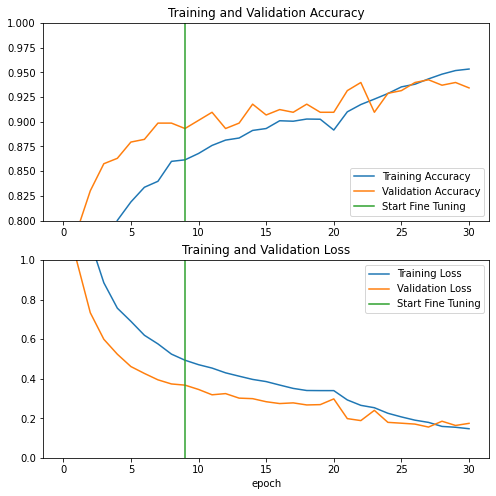

In [163]:
acc += history_fine.history['accuracy']
val_acc += history_fine.history['val_accuracy']

loss += history_fine.history['loss']
val_loss += history_fine.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.ylim([0.8, 1])
plt.plot([initial_epochs-1,initial_epochs-1],
          plt.ylim(), label='Start Fine Tuning')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.ylim([0, 1.0])
plt.plot([initial_epochs-1,initial_epochs-1],
         plt.ylim(), label='Start Fine Tuning')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

Hasil percobaan fine tuning dari model sebelumnya dapat terlihat dari plot (dibatasi dengan garis hijau), setelah di fine tuning gap antara data validation dan data training semakin dekat dan naik/turun lebih cepat. Sebelumnya akurasi yang didapatkan model sudah bagus yakni 0.95(95%) dan setelah di fine tuning naik menjadi 0.96(96%).

In [164]:
loss, accuracy = model_MobileNetV2.evaluate(test_dataset)
print('Test accuracy :', accuracy)

73/73 [==============================] - 2s 24ms/step - loss: 0.1048 - accuracy: 0.9671
Test accuracy : 0.96712327003479


## Model Inference (after fine tuning)

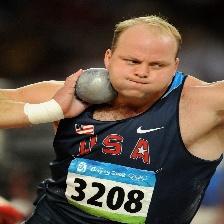

In [165]:
test_image = r'73 Sports Image Classification/test/shot put/3.jpg'

img = keras.preprocessing.image.load_img(
    test_image, target_size=(IMG_HEIGHT, IMG_WIDTH)
)

img

In [166]:
img_array = keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)

predictions = model_MobileNetV2.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

This image most likely belongs to shot put with a 99.98 percent confidence.


Hasil prediksi pun naik 1% dari prediksi sebelumnya setelah di fine tuning.

# Custom model

Creator dataset ini menclaim bahwa dataset ini sudah bersih dan siap digunakan, bahkan jika model yang dibuat bagus maka akurasi yang didapat akan tinggi (90-98%!). Si creator juga menyertakan pretrained-model bersamaan dengan dataset ini, untuk itu mari kita coba apakah benar claim si creator ini.

In [17]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [13]:
base_model = keras.models.load_model("73 Sports Image Classification/EfficientNetB1-sports-99.17.h5")

In [14]:
base_learning_rate = 0.0001

base_model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=base_learning_rate),
              loss = tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics = ['accuracy'])

In [20]:
base_model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
rescaling (Rescaling)           (None, 224, 224, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
normalization (Normalization)   (None, 224, 224, 3)  7           rescaling[0][0]                  
__________________________________________________________________________________________________
stem_conv_pad (ZeroPadding2D)   (None, 225, 225, 3)  0           normalization[0][0]              
_______________________________________________________________________________________

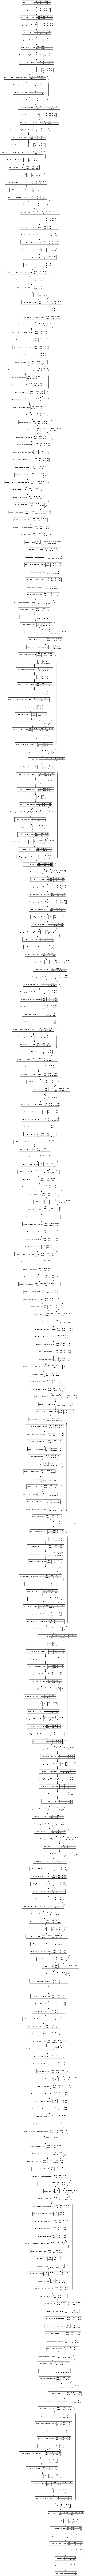

In [15]:
keras.utils.plot_model(base_model, show_shapes=True)

In [15]:
epochs = 3
history = base_model.fit(train_dataset, validation_data=val_dataset, epochs=epochs)

Epoch 1/3
2084/2084 [==============================] - 444s 203ms/step - loss: 0.8479 - accuracy: 0.9224 - val_loss: 0.6486 - val_accuracy: 0.9808
Epoch 2/3
2084/2084 [==============================] - 420s 201ms/step - loss: 0.6525 - accuracy: 0.9698 - val_loss: 0.6007 - val_accuracy: 0.9836
Epoch 3/3
2084/2084 [==============================] - 426s 204ms/step - loss: 0.5980 - accuracy: 0.9770 - val_loss: 0.6640 - val_accuracy: 0.9863


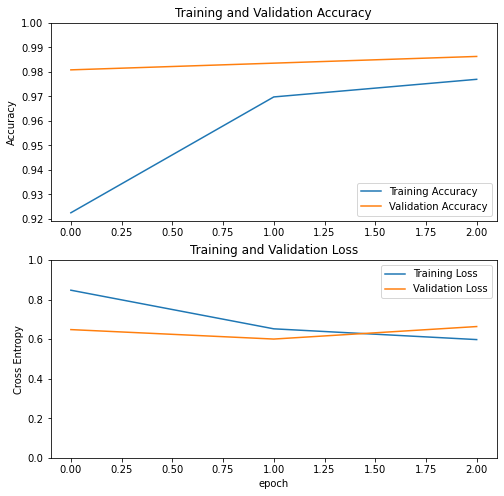

In [16]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [17]:
loss, accuracy = base_model.evaluate(test_dataset)
print('Test accuracy :', accuracy)

73/73 [==============================] - 3s 44ms/step - loss: 0.6298 - accuracy: 0.9808
Test accuracy : 0.9808219075202942


Akurasi yang didapat adalah 98%. Disini saya hanya mencoba dengan 3x epoch saja karena butuh waktu yang cukup lama jika ditambahkan epochnya. Dari grafik sendiri pun dirasa belum cukup menggambarkan banyak hal karena minimnya epoch yang dijalankan. Jika melihat dari nilai akurasi saja memang hasil model ini sudah bagus.

## Model Inference

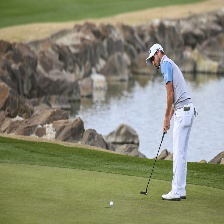

In [18]:
test_image = r'73 Sports Image Classification/test/golf/2.jpg'

img = keras.preprocessing.image.load_img(
    test_image, target_size=(IMG_HEIGHT, IMG_WIDTH)
)

img

In [23]:
img_array = keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)

predictions = base_model.predict(img_array)

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(predictions)], 100 * np.max(predictions))
)

This image most likely belongs to golf with a 99.97 percent confidence.


# Conclusion

Dari ketiga keempat percobaan model klasifikasi yang sudah saya lakukan di atas dapat diambil beberapa kesimpulan:
1. Model akan mendapatkan hasil yang maksimal jika dataset yang dimasukkan adalah dataset yang baik.
2. Akurasi sebuah model ditentukan dari pemodelan infrastruktur model tersebut, semakin dibuat dengan perhitungan yang baik maka hasil yang didapat juga semakin baik.
3. Gunakan pre-trained model yang telah terbukti performanya (MobileNetV2, RestNet, VGG, dll). Selain menghemat waktu, hasil yang didapatpun kemungkinan besar lebih baik. Namun tidak lupa juga untuk disesuaikan dengan dataset masing-masing, bisa saja diantara pretrained model yang sudah saya sebutkan sebelumnya tidak ada yang cocok untuk case dataset anda.
4. Gunakan data_augmentation, batchnormalization, dropout untuk mencegah model untuk overfitting.